# Текущий список вопросов к проектному заданию.
Полные данные и подробное описание задачи можно найти здесь

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import random
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

#### 1. Признаки какого вида встречаются в данных?
Открыть данные с помощью pandas и посмотреть на первые несколько строк таблицы.

In [2]:
data = pd.read_csv('shrinked_project_data.csv')
data.head()

,Unnamed: 0,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,96318,69249293,Mobile Desktop Support Analyst,Introduction A Support Analyst with experience...,London,London,NaN,NaN,Matchtech Group plc.,Engineering Jobs,Up to 32/hr,61440,rengineeringjobs.com
1,166582,71298764,Occupational Therapist,OT Role Birmingham At Recruiting for Care thi...,"Birimingham, Birmingham",UK,part_time,contract,Recruiting for Care,Social work Jobs,20 - 30/hour,48000,cv-library.co.uk
2,36385,68256674,Regional Sales Executive,"Our client, who is one of the UKs largest indu...",Leeds,Leeds,NaN,permanent,NaN,HR & Recruitment Jobs,15k - 20k,17500,careersinrecruitment.com
3,80896,69023774,Domiciliary Branch Manager Welwyn Garden City,Our client is currently recruiting for an expe...,"Welwyn Garden City, Hertfordshire",Welwyn Garden City,NaN,permanent,Maxim recruitment Solutions,Social work Jobs,29000 - 31000/annum,30000,cv-library.co.uk
4,90305,69165486,Digital communities editor,We are a global charitable foundation dedicate...,London,London,NaN,NaN,Wellcome trust,Creative & Design Jobs,"28,000 dependant on experience",28000,journalism.co.uk


Ответ: есть категориальные (например, Location, Company) и вещественные (например, SalaryNormalized).
#### 2. Найти самые популярные и редкие слова в тексте (здесь и далее речь идет о поле FullDescription). Объяснить почему именно эти слова встречаются так часто или так редко.
Прочитать про класс sklearn.feature_extraction.text.CountVectorizer, его методы fit и transform. Понять как кодирующей матрице получить частоты слов.

In [31]:
texts = data['FullDescription']
vectorizer = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
model = vectorizer.fit(texts)
text_model = model.transform(texts)
text_model = text_model.toarray()

In [4]:
nums = np.sum(text_model,axis=0)
indices = np.argsort(nums)
words_pop = np.array(vectorizer.get_feature_names())[indices[-20:]]
print('frequent: '+', '.join(words_pop))
words_rare = np.array(vectorizer.get_feature_names())[indices[:20]]
print('rare: '+', '.join(words_rare))

frequent: required, service, excellent, support, job, looking, development, uk, company, manager, management, client, sales, working, skills, business, team, work, role, experience
rare: knees, matlabfpga, matrixes, mattastutejobs, matthewhayesfirstselection, matthewssearch, mattinsonpartnership, matlabdue, mattock, matttechpeople, matures, maudsley, maui, maunufature, maureenhughes, mattress, mauritius, mathsteacherswanted_job, mathsandenglishtutor_job, materialsdeveloping


Самые частые слова - положительно окрашены, связаны с работой и успехом.
Самые редкие - я таких даже не знаю... что-то похоже на тэги (без пробелов), что-то на опечатки, что-то просто очень странное.


#### 3. Построить распределение целевой переменной. Посчитать её среднее значение, медиану, дисперсию. Как выглядят объявления, в которых предлагается очень маленькая и очень большая зарплата? При выполнении задания полезным может оказаться метод pandas.DataFrame.quantile.
Освежить в памяти занятия по pandas. Плотность можно построить с помощью метода pandas.DataFrame.hist, остальные функции не составит труда найти.

mean: 34136.1966744
median: 30000.0
variance: 316129147.814


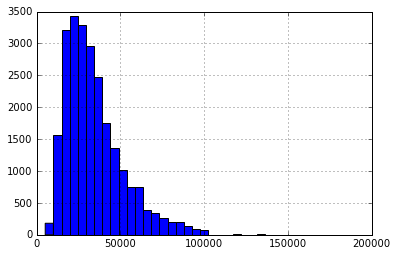

In [23]:
salary = data['SalaryNormalized']
salary.hist(bins=40)
print('mean: '+str(salary.mean()))
print('median: '+str(salary.median()))
print('variance: '+str(salary.var()))

In [6]:
pd.set_option('display.max_colwidth', -1)

In [79]:
low_salary = data[data['SalaryNormalized'] < salary.quantile(q=0.01)]
ind = random.randint(0,len(low_salary))
print(low_salary[ind:(ind+1)]['FullDescription'])
#выдается случайное объявление из группы низких зарплат

5308    The employer is looking for someone enthusiastic, willing, honest, has integrity, loyal, obedient who wants to succeed and get ahead in life. The candidate for this job will need to be able to drive and arrange their own transport to our premises in Watton, Norfolk. They will need to be clear spoken, very good telephone manner and be a wellpresented confident person in nature. The job itself will involve keeping records of sales from initial visits through to sale completion, sending out marketing literature, training in the facetoface sales will be a progression route. Mostly the candidate will be working in the office at Watton supporting the sales staff with record keeping, communicate with people across all areas of the business, support with welcoming visitors. Targets will be set and if these are achieved there is potential to vastly increase the hourly wage to above national minimum wage
Name: FullDescription, dtype: object


In [80]:
high_salary = data[data['SalaryNormalized'] > salary.quantile(q=0.99)]
ind = random.randint(0,len(high_salary))
print(high_salary[ind:(ind+1)]['FullDescription'])
#выдается случайное объявление из группы высоких зарплат

19059    Our Client is a longstanding privatelyheld company and a global manufacturer and marketer of quality branded rodent control products, caring control products for pets and wildlife, natural solutions for home and garden, wild bird feeding products, and garden dcor to consumers and the professional pest control market. The role: To deliver growth and sales across ecommerce accounts by developing new business and managing existing ecommerce accounts; To develop strong German customer relationships in order to deliver long term sales growth in line with agreed strategies; Provide high standards of German customer relationship management to drive new and repeat business opportunities; To develop operational and tactical sales and marketing plans to achieve agreed goals; To create and manage an effective network with relevant Corporation and associated third party agency resources. Your profile: Demonstrable experience of developing third party online accounts; Technical understandi

Кажется, что в объявлениях с низкими зарплатами больше четких требований, в объявлениях с высокими зарплатами много красивых слов. И должности различаются, конечно.

#### 4. Предлагаемый авторами задания критерий качества - среднее абсолютное отклонение предсказания. Вычислить значение ошибки предсказания, если в качестве предсказания будет использоваться среднее значение зарплаты.

Подумайте, может ли какое-то другое число давать меньшее значение ошибки?

In [13]:
mad_mean = np.abs(salary - salary.mean()).mean()
print(mad_mean)
mad_median = np.abs(salary - salary.median()).mean()
print(mad_median)

13472.3265926
13039.7096049


Если за предсказание взять медиану, то значение ошибки немного уменьшится. Медиана лучше отражает выборку, так как ср.арифм. смещено в сторону редких больших зарплат.

#### 5. Найти слова, которые часто встречаются рядом: пары, тройки. Можно ли как-то объяснить их соседство?

Продолжить знакомство с классом sklearn.feature_extraction.text.CountVectorizer, обратить внимание на параметр ngram_range.

In [4]:
vectorizer = CountVectorizer(analyzer='word', stop_words='english', ngram_range=(2,3), max_features = 100, lowercase=True)
model = vectorizer.fit(texts)
text_model = model.transform(texts)
text_model = text_model.toarray() 

In [5]:
nums = np.sum(text_model,axis=0)
indices = np.argsort(nums)
words_pop = np.array(vectorizer.get_feature_names())[indices[-20:]]
print('frequent: '+', '.join(words_pop))

frequent: previous experience, employment business, track record, send cv, employment agency, customer service, successful candidate, experience working, communication skills, totaljobs com, www totaljobs com, www totaljobs, posted www totaljobs, totaljobs com jobseeking, com jobseeking, originally posted www, posted www, job originally posted, job originally, originally posted


Это устойчивые словосочетания, которые часто встречаются в объявлениях. Самые частотные - это адрес сайта, упоминающегося почти в каждом объявлении, и слова, вводящие адрес сайта (job originally posted ...), которые также встречаются очень часто в объявлениях. В целом - некоторые клише объявлений.
#### 6. Для нескольких слов постройте распределение числа их вхождений в текст. Каким известным распределением можно описать получившуюся зависимость?

Некоторые слова встречаются в текстах редко. Можно попробовать строить распределение на основе только тех текстов, в которых встречается данное слово. Здесь может помочь функция numpy.nonzero().

In [6]:
#повторение части задания поиска самых частотных слов с добавленным параметром max_features.
#так как уже не могу получить индексы из запуска кода второго задания - сервер не тянет (memory error)
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 100, lowercase=True)
model = vectorizer.fit(texts)
text_model = model.transform(texts)
text_model = text_model.toarray()
nums = np.sum(text_model,axis=0)
indices = np.argsort(nums)

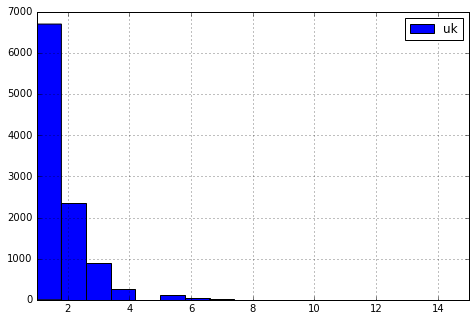

In [77]:
#выбор рандомного слова из самых частотных и построение его распределения
word_ind = random.choice(indices[-20:])
word = np.array(vectorizer.get_feature_names())[word_ind]
word_dist = text_model[:,word_ind]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim([1, 15])
pd.Series(word_dist[np.nonzero(word_dist)]).hist(bins=20,label=word) #смотрим только на тексты, где есть рассматриваемое слово (нули выкинуты)
ax.legend()

Зависимость можно описать распределением Пуассона.

Готовим данные:

In [14]:
texts = data['FullDescription']
salary = data['SalaryNormalized']

In [15]:
#Разные векторизаторы для дальнейшего использования
#граница max_features - для скорости и предотвращения проблем с памятью

vectorizers = []
names = ["CountVectorizer", "TfVectorizer", "TfidfVectorizer"]

vectorizer_models = [
    CountVectorizer(analyzer='word', stop_words='english', lowercase=True, max_features = 1000),
    TfidfVectorizer(analyzer='word', stop_words='english', use_idf = False, lowercase=True, max_features = 1000),
    TfidfVectorizer(analyzer='word', stop_words='english', lowercase=True, max_features = 1000)
    ]

for name, vect in zip(names, vectorizer_models):
    vectorizer = vect
    texts_count = vectorizer.fit_transform(texts)
    texts_train, texts_test, salary_train, salary_test = train_test_split(texts_count, salary)
    vectorizers.append((texts_train, texts_test, salary_train, salary_test,name))

#### 7. Обучить на данных простую модель линейной регрессии.
    - Попробовать три метода вложения текстов: CountVectorizer, tf и tf-idf.
    - Попробовать несколько стратегий регуляризации, подобрать параметры регуляризации.
    - Исследовать иные возможности настройки параметров этих методов.
    - Измерить качество обученной линейной модели.

In [17]:
#для каждого варианта регуляризации смотрим на разные возможные регуляризации и подбираем их параметры

params = {
    'alpha': np.arange(0, 1.1, 0.1),
    'penalty': ['l1','l2']
}
for sample in vectorizers:
    grid_search = GridSearchCV(SGDRegressor(), params).fit(sample[0],sample[2])
    print(sample[4]+' '+str(grid_search.best_score_)+' '+str(grid_search.best_params_))

params = {
    'l1_ratio': np.arange(0, 1.1, 0.1),
}

for sample in vectorizers:
    grid_search = GridSearchCV(SGDRegressor(penalty='elasticnet'), params).fit(sample[0],sample[2])
    print(sample[4]+' '+str(grid_search.best_score_)+' '+str(grid_search.best_params_))

CountVectorizer -0.0936321959288 {'penalty': 'l2', 'alpha': 0.40000000000000002}
TfVectorizer 0.125955516603 {'penalty': 'l1', 'alpha': 0.10000000000000001}
TfidfVectorizer 0.1230870672 {'penalty': 'l2', 'alpha': 0.0}
CountVectorizer -99.6376584266 {'l1_ratio': 0.60000000000000009}
TfVectorizer 0.125909991131 {'l1_ratio': 0.90000000000000002}
TfidfVectorizer 0.122581724138 {'l1_ratio': 1.0}


Лучше всего работает TfVectorizer (l1, alpha=0.1), а CountVecrorizer дает странные неадекватные числа при такой настройке модели.

#### 8. Выбрать самые информативные признаки с помощью одной из обученных линейных моделей. Для этого достаточно найти слова, соответствующие самым большим весам регрессии. Что это за слова? Почему у них большой вес?

In [18]:
vectorizer=TfidfVectorizer(analyzer='word', stop_words='english', lowercase=True, use_idf = False, max_features = 1000)
trans = vectorizer.fit_transform(texts)
vectline = SGDRegressor(penalty='l1',alpha=0.1).fit(vectorizers[1][0],vectorizers[1][2])
indices = np.argsort(vectline.coef_)
words_pop = np.array(vectorizer.get_feature_names())[indices[-20:]]
print(words_pop)

['financial' 'services' 'technical' 'strong' 'work' 'leading' 'projects'
 'team' 'london' 'senior' 'role' 'client' 'uk' 'manager' 'design'
 'development' 'project' 'management' 'business' 'experience']


Это слова про успешных людей, их появление сильно зависит от зарплаты.

#### 9. Ввести в данные несколько дополнительных признаков объектов, которые были бы способны улучшить качество предсказания. Это может быть информация о регионе, в котором предложена вакансия, это может быть категория вакансии. Обучить линейную модель с новыми дополнительными признаками.

In [19]:
#Добавляем признаки

Xs = []

vect = TfidfVectorizer(analyzer='word', stop_words='english', lowercase=True, use_idf = False, max_features = 1000)
tmod = vect.fit_transform(texts)
Xs.append(('Description ',tmod))

city = data['LocationNormalized']
vect = LabelEncoder()
vect2 = OneHotEncoder()
citmod = vect.fit_transform(city)[...,None]
citmod = vect2.fit_transform(citmod)
Xs.append(('Description+Location ',hstack([tmod,citmod])))

cat = data['Category']
vect = LabelEncoder()
vect2 = OneHotEncoder()
cmod = vect.fit_transform(cat)[...,None]
cmod = vect2.fit_transform(cmod)
Xs.append(('Description+Location+Category ',hstack([tmod,citmod,cmod])))

cont = data['ContractType']
cont = cont.factorize()[0]
vect = LabelEncoder()
vect2 = OneHotEncoder()
contmod = vect.fit_transform(cont)[...,None]
contmod = vect2.fit_transform(contmod)
Xs.append(('Description+Location+Category+ContractType ',hstack([tmod,citmod,cmod,contmod])))

contt = data['ContractTime']
contt = contt.factorize()[0]
vect = LabelEncoder()
vect2 = OneHotEncoder()
conttmod = vect.fit_transform(contt)[...,None]
conttmod = vect2.fit_transform(conttmod)
Xs.append(('Description+Location+Category+ContractType+Time ',hstack([tmod,citmod,cmod,contmod,conttmod])))

s = data['SourceName']
s = s.factorize()[0]
vect = LabelEncoder()
vect2 = OneHotEncoder()
smod = vect.fit_transform(s)[...,None]
smod = vect2.fit_transform(smod)
Xs.append(('Description+Location+Category+ContractType+Time+Source ',hstack([tmod,citmod,cmod,contmod,conttmod,smod])))

titles = data['Title']
vect = TfidfVectorizer(analyzer='word', stop_words='english', lowercase=True, use_idf = False, max_features = 1000)
titlemod = vect.fit_transform(titles)
Xs.append(('Description+Location+Category+ContractType+Time+Source+Title ', \
           hstack([tmod,citmod,cmod,contmod,conttmod,smod,titlemod])))

comp = data['Company']
comp = comp.fillna('No information')
vect = LabelEncoder()
vect2 = OneHotEncoder()
compmod = vect.fit_transform(comp)[...,None]
compmod = vect2.fit_transform(compmod)
Xs.append(('Description+Location+Category+ContractType+Time+Source+Title+Company ', \
           hstack([tmod,citmod,cmod,contmod,conttmod,smod,titlemod,compmod])))

In [21]:
for X in Xs:
    texts_train, texts_test, salary_train, salary_test = train_test_split(X[1], salary)
    vectline = SGDRegressor(penalty='l1',alpha=0.1)
    vectline.fit(texts_train,salary_train)
    print(X[0]+str(vectline.score(texts_test,salary_test)))

Description 0.162176592027
Description+Location 0.224402979531
Description+Location+Category 0.310905850187
Description+Location+Category+ContractType 0.36415188815
Description+Location+Category+ContractType+Time 0.362766389002
Description+Location+Category+ContractType+Time+Source 0.41584579607
Description+Location+Category+ContractType+Time+Source+Title 0.474503038704
Description+Location+Category+ContractType+Time+Source+Title+Company 0.466324219949


Компания даже немного ухудшает качество, не будем ее учитывать,лучше взять Description+Location+Category+ContractType+Time+Source+Title.

#### 10. Обучить на данных [случайный лес](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). 

    - Попробовать три метода вложения текстов: CountVectorizer, tf и tf-idf.
    - Подобрать максимальную глубину деревьев для деревьев леса; использовать не менее 10 деревьев, их число можно также попробовать подобрать
    - Измерить качество обученной модели.
    
 * Для воспроизводимости результатов можно зафиксировать случайное состояние random_state, из которого начинает работу алгоритм *

In [ ]:
#сократили обучающую выборку, чтобы была скорость (все равно медленно) и не было проблем с памятью

params = {
    'n_estimators': np.arange(10,20),
    'max_depth': np.arange(1,10)
}

for sample in vectorizers:
    grid_search = GridSearchCV(RandomForestRegressor(), params).fit(sample[0][:5000],sample[2][:5000])
    print(sample[4]+' '+str(grid_search.best_score_)+' '+str(grid_search.best_params_))

В лесу лучше всего работает TfVectorizer. Лес работает лучше линейной регресии (но намного дольше).

#### 11. Выбрать самые информативные признаки случайного леса с помощью его атрибута *feature_importances_*. Каким словам они соответствуют? Отличаются ли они от информативных признаков линейной модели?

In [ ]:
#indices = np.argsort(vectline.coef_)
#words_pop = np.array(vectorizer.get_feature_names())[indices[-20:]]
#print(words_pop)
tree = RandomForestRegressor(n_estimators = 19, max_depth=9).fit(vectorizers[1][0],vectorizers[1][2])

In [ ]:
vectorizer=TfidfVectorizer(analyzer='word', stop_words='english', use_idf=False, lowercase=True, max_features = 1000)
trans = vectorizer.fit_transform(texts)
indices = np.argsort(tree.feature_importances_)
words_pop = np.array(vectorizer.get_feature_names())[indices[-20:]]
print(words_pop)

Слова пересекаются довольно сильно с самыми информативными словами линейной модели, это те же слова, появление которых может зависеть от уровня объявления, от уровня предлагаемой зарплаты.